In [13]:
import cv2
import sys
sys.path.append("../")
import data
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import pickle
import anchors
import augmenter
import tensorflow as tf
%matplotlib notebook

In [14]:
def print_image(img_in, boxes, normalised = False, anchors = None):
    img = img_in.copy()
    plt.figure(figsize = (3, 3))
    h, w, _ = img.shape
    for box in boxes:
        if normalised:
            cv2.rectangle(img, (int(box[0]*h),int(box[1]*w)), (int(box[2]*h), int(box[3]*w)), (0,255,0), 3)                
        else:
            cv2.rectangle(img, (int(box[0]),int(box[1])), (int(box[2]), int(box[3])), (0,255,0), 3)
    if anchors is not None:
        for box in anchors:
            if normalised:
                cv2.rectangle(img, (int(box[0]*h),int(box[1]*w)), (int(box[2]*h), int(box[3]*w)), (255,0,0), 3)                
            else:
                cv2.rectangle(img, (int(box[0]*h),int(box[1]*w)), (int(box[2]*h), int(box[3]*w)), (255,0,0), 3)                
    plt.imshow(img)
    plt.show()

In [15]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
gpu_aug = augmenter.AugmenterGPU(sess, (1024, 1024))
sess.run(tf.global_variables_initializer())

(3,)


In [16]:
norm = False
data_train = pickle.load(file = open('../wider_train.p', 'rb'))
svc = data.DataService(data_train, False, '../../WIDER/train_images/', (1024, 1024), normalised = norm)

### Verify Rotate

In [5]:
# i = 2
# lbl = lbls[i].copy()
# ang = r_params[i]['ang']
# cos = np.cos(ang)
# sin = np.sin(ang)
# w_h = lbl[:, 2:]-lbl[:, :2]
# centers = (lbl[:, 2:] + lbl[:, :2])/2
# w_h_n = np.matmul([[cos, sin], [sin, cos]], w_h.T).T
# centers_off = np.array(centers - np.tile([512, 512], [lbl.shape[0], 1]), np.float64)
# rot_mat = np.array([[cos, sin],
#                     [-sin, cos]])
# centers_new_c = np.matmul(rot_mat, centers_off.T).T
# centers_new = centers_new_c + np.tile([512, 512], [lbl.shape[0], 1])
# box_out = np.concatenate([centers_new - w_h_n/2, centers_new + w_h_n/2], axis = 1)
# print_image(imgs_rot[i], box_out, normalised = False)

### Show Augment

In [6]:
imgs, lbls = svc.random_sample(10, ret_raw = True)
imgs_rot, lbls_rot, r_params = gpu_aug.augment_batch(imgs, lbls)

{'ang': 0.28852096, 'flip_lr': True, 'flip_ud': False, 'color_augs': {'brightness': False, 'contrast': False, 'hue': False, 'saturation': True, 'grayscale': False, 'salt_pepper': False}, 'id': 2, 'r_crop': True}


<IPython.core.display.Javascript object>


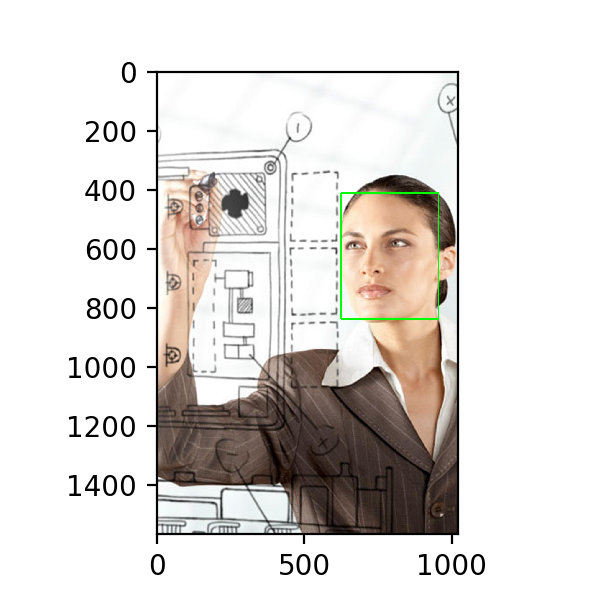

<IPython.core.display.Javascript object>


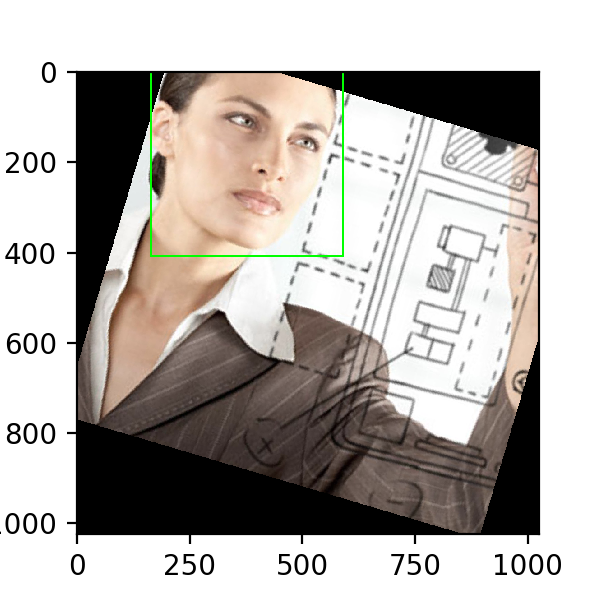

In [12]:
i = 2
print(r_params[i])
print_image(imgs[i], lbls[i], normalised = False)
print_image(imgs_rot[i], lbls_rot[i], normalised = False)

In [ ]:
# i = 9
# print(r_params[i])
# print_image(imgs[i], lbls[i], normalised = False)
# print_image(imgs_rot[i], lbls_rot[i], normalised = False)